Skeleton Code

In [1]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

# Function to download and load dataset
def load_data():
    page_url = 'https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones'
    page_response = requests.get(page_url)
    if page_response.status_code == 200:
        soup = BeautifulSoup(page_response.content, 'html.parser')
        download_link = soup.select_one('a[href$=".zip"]')['href']
        full_download_url = 'https://archive.ics.uci.edu' + download_link
        response = requests.get(full_download_url)
        if response.status_code == 200:
            with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
                inner_zip_name = 'UCI HAR Dataset.zip'
                with outer_zip.open(inner_zip_name) as inner_zip_file:
                    with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                        with inner_zip.open('UCI HAR Dataset/train/X_train.txt') as myfile:
                            df = pd.read_csv(myfile, delim_whitespace=True, header=None)
                        with inner_zip.open('UCI HAR Dataset/train/y_train.txt') as myfile_y:
                            y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)
    else:
        raise Exception("Failed to download or parse the dataset.")
    return df, y

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import time

# Load dataset
df, y = load_data()

<ipython-input-1-836ccc4d8ebc>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(myfile, delim_whitespace=True, header=None)
<ipython-input-1-836ccc4d8ebc>:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB
None
               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    

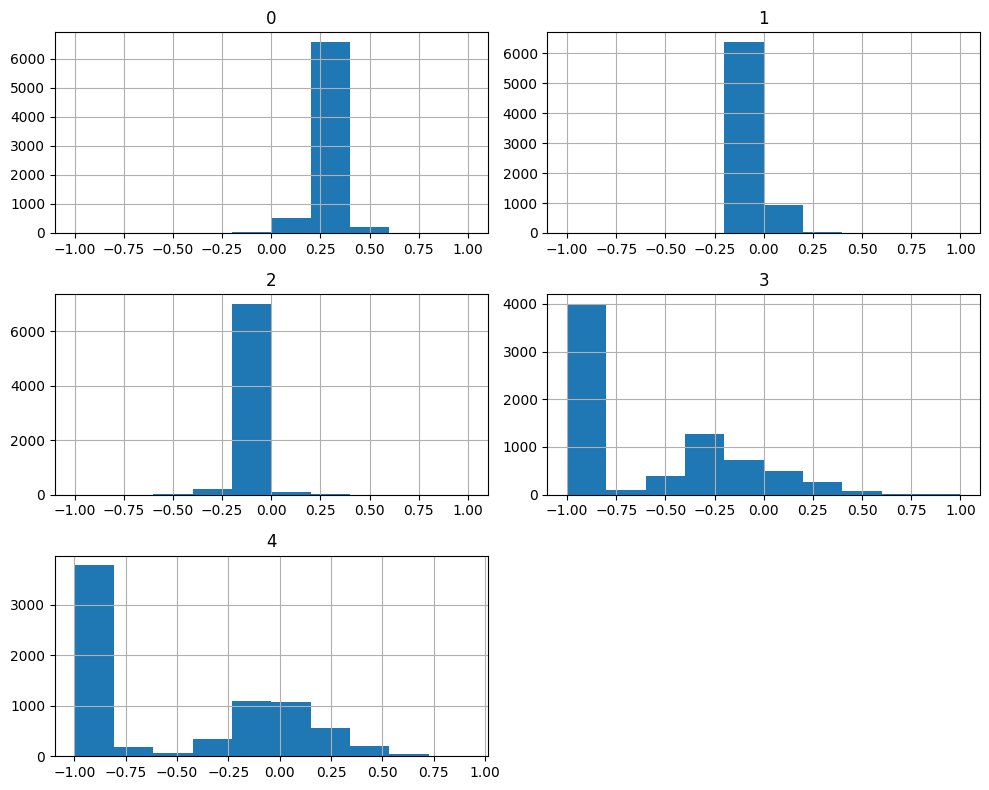

In [3]:

print(df.info())
print(df.describe())


print(df.isnull().sum())


print(y.value_counts())



import matplotlib.pyplot as plt
import seaborn as sns


df.iloc[:, :5].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [4]:
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y.values.ravel())

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [6]:
X_train_full, X_test_full, y_train, y_test = train_test_split(df_scaled, encoded_y, test_size=0.2, random_state=42)

In [7]:
# prompt: #TASK 5 - 1. Create a pipeline using Gaussian Naive Bayes
# #         2. Fit the model to the training data
# #         3. Predict values for test set
# #         4. Print accuracy score

from sklearn.naive_bayes import GaussianNB

# Create a pipeline with Gaussian Naive Bayes
pipeline = Pipeline([
    ('classifier', GaussianNB())
])

# Fit the model to the training data
pipeline.fit(X_train_full, y_train)

# Predict values for the test set
y_pred = pipeline.predict(X_test_full)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7314751869476547


In [8]:

import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# ... (rest of your code)

# Note the start time
start_time = time.time()

# ... (your pipeline creation and fitting code)

# Create a pipeline with Gaussian Naive Bayes
pipeline = Pipeline([
    ('classifier', GaussianNB())
])

# Fit the model to the training data
pipeline.fit(X_train_full, y_train)

# Predict values for the test set
y_pred = pipeline.predict(X_test_full)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Note the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for model training and inference: {elapsed_time:.2f} seconds")

Accuracy: 0.7314751869476547
Time taken for model training and inference: 0.09 seconds


In [9]:
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled.T)  # Transpose to treat features as data points
selected_features_indices = [np.random.choice(np.where(kmeans.labels_ == i)[0]) for i in range(n_clusters)]
selected_features = df_scaled[:, selected_features_indices]